# Step2 Network and Word Cloud Analysis

In [1]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import cPickle as p
%matplotlib inline

Manually deleted "image omitted" string

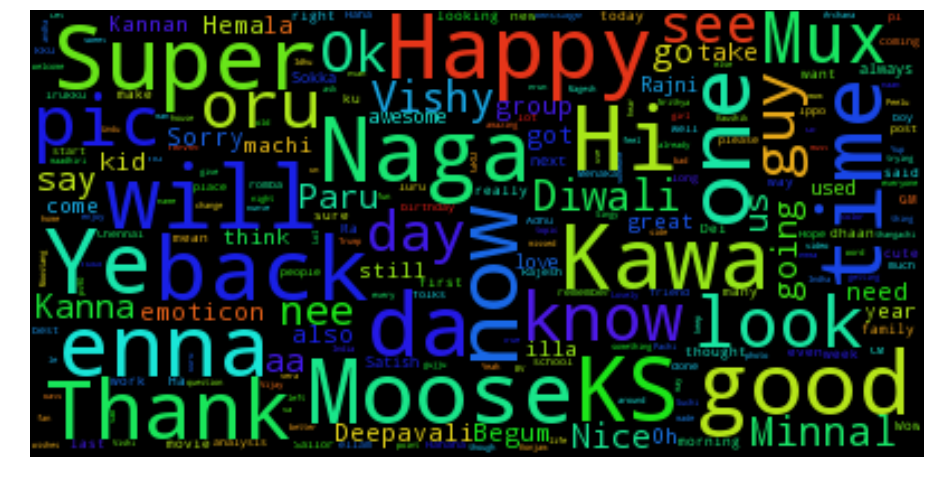

In [2]:
text = open('words.txt').read()
stopwords = set(STOPWORDS)
stopwords.add("<image omitted>")
stopwords.add("omitted")
stopwords.add("image")
wc = WordCloud(background_color="black", max_words=2000,stopwords=stopwords,max_font_size=40)
wordcloud = wc.generate(text)
plt.figure(figsize=(16, 12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [3]:
d = p.load(open('chats2.pik','rb'))
topics = p.load(open('topics.pik','rb'))
senders = p.load(open('senders.pik','rb'))
lookup = p.load(open('lookup.pik','rb'))

In [4]:
adj=[]
ts=[]
for x in d:
    if len(x[1].strip().encode('ascii','ignore')) > 1:
        if lookup.has_key(x[1].strip().encode('ascii','ignore')):
            l = lookup[x[1].strip().encode('ascii','ignore')]
        else:
            l = x[1].strip().encode('ascii','ignore')
        for y in x[2].split(' '):
            if y.encode('ascii','ignore') in senders:
                adj.append((l,y.encode('ascii','ignore')))
                ts.append((l,y.encode('ascii','ignore'),x[0]))
            if y.encode('ascii','ignore') in topics.keys():
                adj.append((l,topics[y.encode('ascii','ignore')]))
                ts.append((l,topics[y.encode('ascii','ignore')],x[0]))
len(adj)

1243

In [5]:
mat=[[0 for i in range(0,len(senders))] for i in range(0,len(senders))]

for j in adj:
    s = senders.index(j[0])
    t = senders.index(j[1])
    mat[s][t]= mat[s][t]+1

elist = [(x[0],x[1],adj.count(x)) for x in set(adj)]

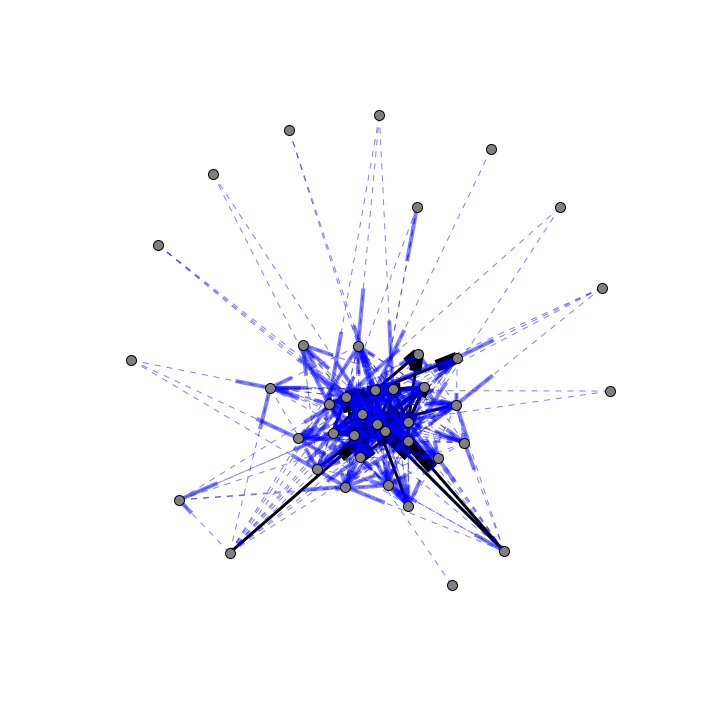

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
G=nx.DiGraph()
for i in elist:
    G.add_edge(i[0],i[1],weight=i[2])

elarge=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] >5]
esmall=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] <=5]

pos=nx.spring_layout(G) # positions for all nodes

plt.figure(3,figsize=(12,12))
plt.axis('off')
nx.draw_networkx_nodes(G,pos,node_size=100,node_color='grey')
nx.draw_networkx_edges(G,pos,edgelist=elarge,
                    width=3)
nx.draw_networkx_edges(G,pos,edgelist=esmall,
                    width=1,alpha=0.5,edge_color='b',style='dashed')
#nx.draw_networkx_labels(G,pos,font_size=12,font_family='sans-serif',font_color='red')
plt.show()

In [7]:
pos['Raj']

array([ 0.41273155,  0.37860149])

In [34]:
mts = [int((i[2]-ts[0][2]).total_seconds()/60) for i in ts]
di=[[] for i in range(0,max(mts)+1)]

for i in ts:
    k=int((i[2]-ts[0][2]).total_seconds()/60)
    di[k].append((i[0],i[1]))
    

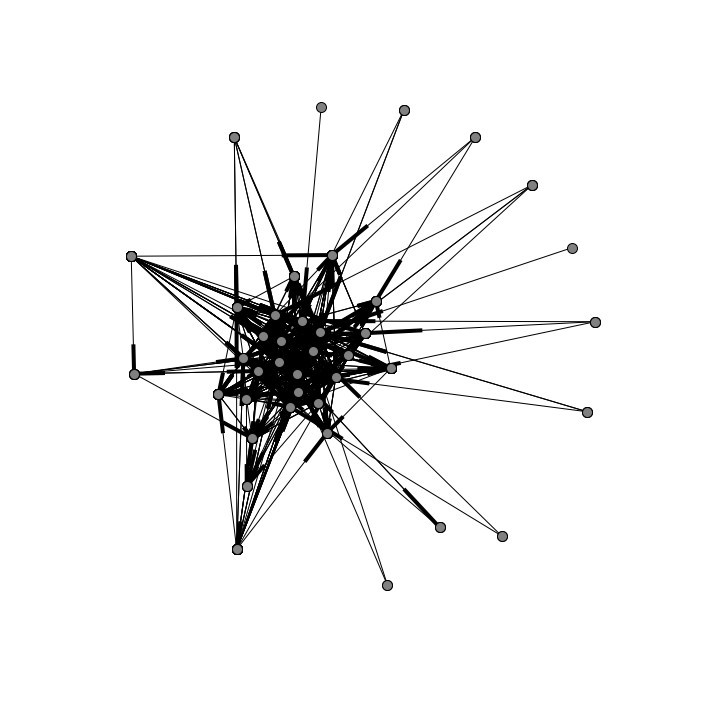

In [35]:
j=0
for i in di:
    G=nx.DiGraph()
    if len(i) >0:
        j=j+1
        for x in i:
            G.add_edge(x[0],x[1])
        plt.figure(3,figsize=(12,12))
        plt.axis('off')
        nx.draw_networkx_nodes(G,pos,node_size=100,node_color='grey')
        nx.draw_networkx_edges(G,pos,width=1)
        plt.savefig("img/img"+str(j)+".png", format="PNG")

At this point, use ffmpeg to create the movie from the images saved above...
```
ffmpeg -r 30 -i img%d.png -vcodec libx264 -crf 25  -pix_fmt yuv420p out.mp4
```